In [12]:
import numpy as np
import itertools
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from six import StringIO
import pydotplus#
import matplotlib.image as mpimg
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from IPython.display import Image 

In [13]:
!pip install wget
!wget https://raw.githubusercontent.com/diogocortiz/Crash-Course-IA/master/ArvoreDecis%C3%A3o/dataset_einstein.csv

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9680 sha256=58e833b3ea41e5bcf8b8f90a62b50c20c3cd40283d048296012633f174f051d3
  Stored in directory: /home/lucas/.cache/pip/wheels/90/1d/93/c863ee832230df5cfc25ca497b3e88e0ee3ea9e44adc46ac62
Successfully built wget
--2021-01-10 14:52:56--  https://raw.githubusercontent.com/diogocortiz/Crash-Course-IA/master/ArvoreDecis%C3%A3o/dataset_einstein.csv
Resolvendo raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.92.133
Conectando-se a raw.githubusercontent.com (raw.githubusercontent.com)|151.101.92.133|:443... conectado.
A requisição HTTP foi enviada, aguardando resposta... 200 OK
Tamanho: 248868 (243K) [text/plain]
Salvando em: “dataset_einstein.csv”

dataset_einstein.cs 100%[===================>] 243,04K  1,56MB/s    em 0,2s    

2021-01-10 14:52:57 (1,56 MB/s) - “dataset_einstein.csv” salvo [248868/248868]



In [21]:
df = pd.read_csv('dataset_einstein.csv', delimiter=';')
print(df.head(5))

        Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes. 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes. 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                     

In [20]:
count_row = df.shape[0]  # PEGANDO OS NÚMEROS DE REGISTROS
count_col = df.shape[1]  # PEGANDO OS NUMEROS DE COLUNAS
print(count_row)
print(count_col)

5644
11


In [22]:
# Drop dados NaN
df = df.dropna()

print(df.head(5))

         Patient ID  Patient age quantile SARS-Cov-2 exam result  \
1   126e9dd13932f68                    17               negative   
8   8bb9d64f0215244                     1               negative   
28  fc41531ca4faf1e                    13               negative   
29  891d0f6449ff3d7                    14               negative   
30  ebdd7c67fcb21b4                     9               negative   

    Patient addmited to regular ward (1=yes. 0=no)  \
1                                                0   
8                                                0   
28                                               0   
29                                               0   
30                                               1   

    Patient addmited to semi-intensive unit (1=yes. 0=no)  \
1                                                   0       
8                                                   1       
28                                                  0       
29                    

In [24]:
print('Quantidade de campos(colunas): ', df.shape[1])
print('Total de registros:', df.shape[0])

Quantidade de campos(colunas):  11
Total de registros: 357


In [30]:
print ('Total de registros negativos: ', df[df['SARS-Cov-2 exam result'] =='negative'].shape[0])
print ('Total de registros positivos: ', df[df['SARS-Cov-2 exam result'] =='positive'].shape[0],"\n\n")



Y = df['SARS-Cov-2 exam result'].values 
print(Y)

# X == FEATURES
# VAMOS PEGAR OS CAMPOS DE TREINAMENTO (Hemoglobin, Leukocytes, Basophils, Proteina C reativa mg/dL)

X = df[['Hemoglobin', 'Leukocytes', 'Basophils','Proteina C reativa mg/dL']].values
print("\n\n")
# VAMOS MOSTRAR X 
print(X)

Total de registros negativos:  302
Total de registros positivos:  55 


['negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' '

In [31]:
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=0.2, random_state=3)

In [32]:
algortimo_arvore = DecisionTreeClassifier(criterion='entropy', max_depth=5)

modelo = algortimo_arvore.fit(X_treino, Y_treino)

[0.13553694 0.56306579 0.18040441 0.12099287]


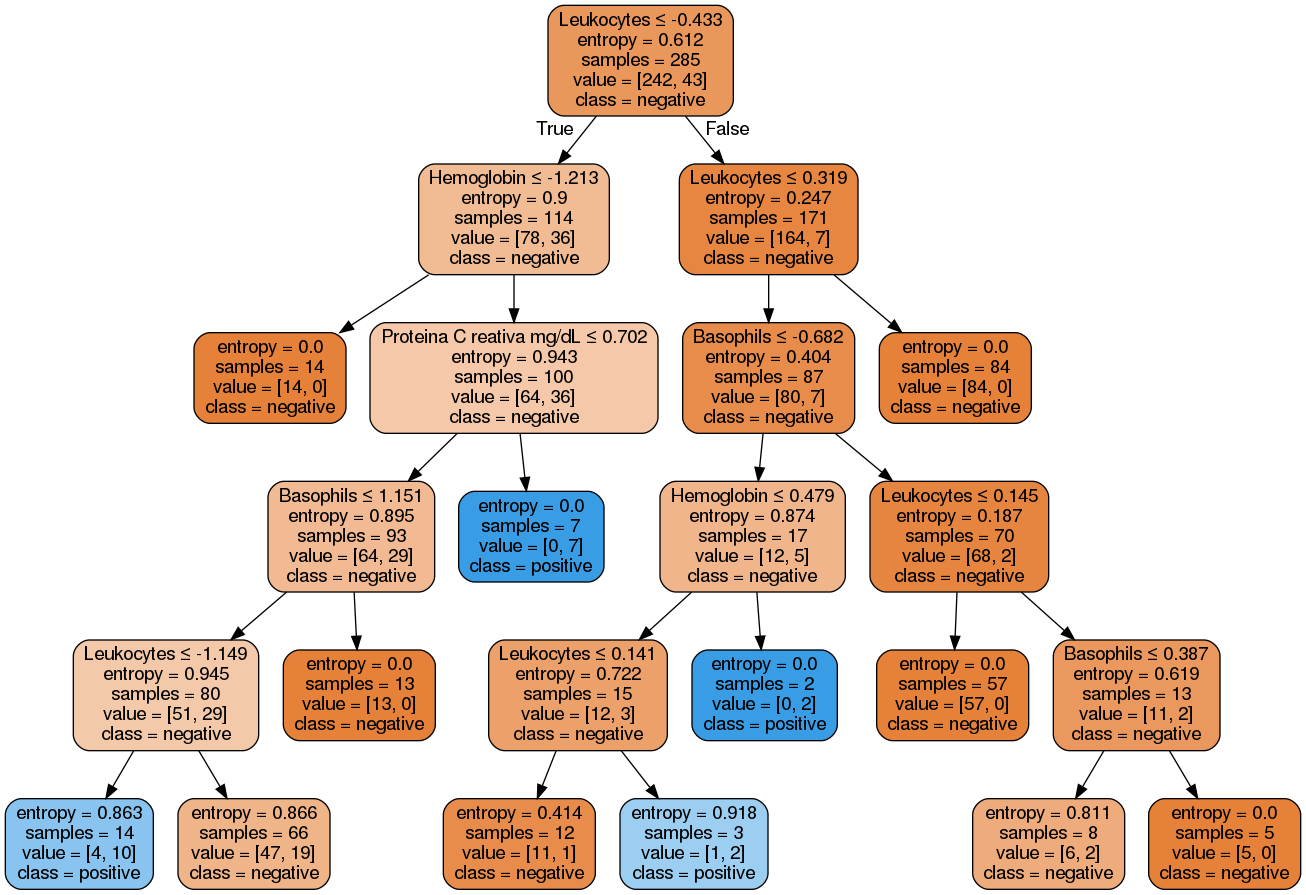

In [35]:
print (modelo.feature_importances_)

nome_features = ['Hemoglobin', 'Leukocytes', 'Basophils','Proteina C reativa mg/dL']
nome_classes = modelo.classes_

# MONTAR A IMAGEM DA ÁRVORE
dot_data = StringIO()
#dot_data = tree.export_graphviz(my_tree_one, out_file=None, feature_names=featureNames)
export_graphviz(modelo, out_file=dot_data, filled=True, feature_names=nome_features, class_names=nome_classes, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())
graph.write_png("arvore.png")
Image('arvore.png')

Feature ranking:
1. feature 1 (0.563066)
2. feature 2 (0.180404)
3. feature 0 (0.135537)
4. feature 3 (0.120993)


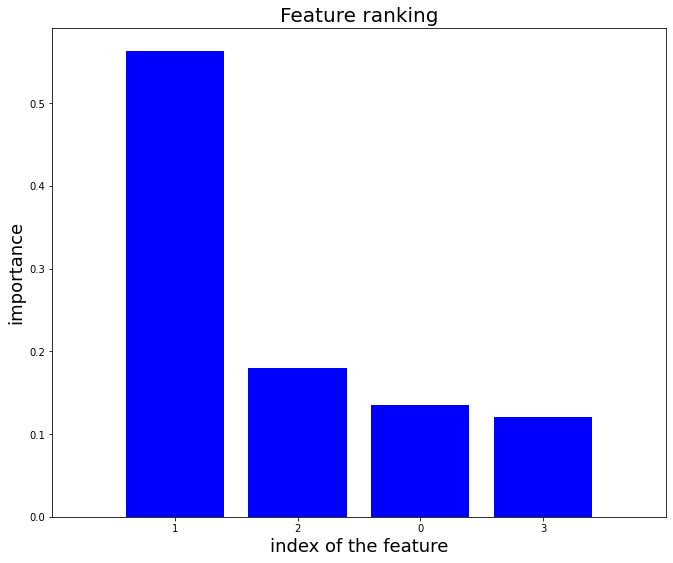

In [36]:
importances = modelo.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
f, ax = plt.subplots(figsize=(11, 9))
plt.title("Feature ranking", fontsize = 20)
plt.bar(range(X.shape[1]), importances[indices],
    color="b", 
    align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.ylabel("importance", fontsize = 18)
plt.xlabel("index of the feature", fontsize = 18)
plt.show()

#Indice das features
# 0 - 'Hemoglobin', 
# 1 - 'Leukocytes'
# 2 - 'Basophils',
# 3 - 'Proteina C reativa mg/dL']

In [37]:
# APLICANDO O MODELO NA BASE DE TESTES E ARMAZENDO O RESULTADO EM Y_PREDICOES
Y_predicoes = modelo.predict(X_teste)

#AVALIAÇÃO DO MODELO 
#VAMOS AVALIAR O VALOR REAL DO DATASET Y_TESTE COM AS PREDIÇÕES
print("ACURÁCIA DA ÁRVORE: ", accuracy_score(Y_teste, Y_predicoes))
print (classification_report(Y_teste, Y_predicoes))

ACURÁCIA DA ÁRVORE:  0.8472222222222222
              precision    recall  f1-score   support

    negative       0.87      0.97      0.91        60
    positive       0.60      0.25      0.35        12

    accuracy                           0.85        72
   macro avg       0.73      0.61      0.63        72
weighted avg       0.82      0.85      0.82        72



Matriz de Confusão sem normalizacão 
[[58  2]
 [ 9  3]]


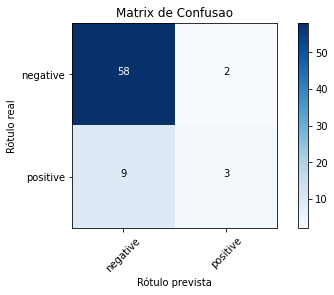

In [39]:

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de Confusão Normalizada")
    else:
        print('Matriz de Confusão sem normalizacão ')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Rótulo real')
    plt.xlabel('Rótulo prevista')

matrix_confusao = confusion_matrix(Y_teste, Y_predicoes)
plt.figure()
plot_confusion_matrix(matrix_confusao, classes=nome_classes,
                      title='Matrix de Confusao')